# Assignment

In [11]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import math
from statsmodels.stats.anova import anova_lm
from statsmodels.sandbox.stats.multicomp import MultiComparison


In [2]:
# create a dataset

df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'medium', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})
df.sample(10)


,water,sun,height
26,weekly,high,6
23,weekly,medium,4
5,daily,medium,5
25,weekly,high,5
14,daily,high,7
3,daily,low,5
11,daily,high,6
8,daily,medium,4
29,weekly,high,8
20,weekly,medium,4


In [5]:
# tukey test kaisay lagana hy two way anova per?
df['2'] = df['sun'].map(
    str) + " + " + df['water'].map(str)

pt = pg.pairwise_tukey(data=df, dv='height', between='2')
print(pt)


                 A                B  mean(A)  mean(B)  diff       se  \
0     high + daily    high + weekly      6.8      6.4   0.4  0.46188   
1     high + daily      low + daily      6.8      5.8   1.0  0.46188   
2     high + daily     low + weekly      6.8      4.0   2.8  0.46188   
3     high + daily   medium + daily      6.8      5.0   1.8  0.46188   
4     high + daily  medium + weekly      6.8      4.0   2.8  0.46188   
5    high + weekly      low + daily      6.4      5.8   0.6  0.46188   
6    high + weekly     low + weekly      6.4      4.0   2.4  0.46188   
7    high + weekly   medium + daily      6.4      5.0   1.4  0.46188   
8    high + weekly  medium + weekly      6.4      4.0   2.4  0.46188   
9      low + daily     low + weekly      5.8      4.0   1.8  0.46188   
10     low + daily   medium + daily      5.8      5.0   0.8  0.46188   
11     low + daily  medium + weekly      5.8      4.0   1.8  0.46188   
12    low + weekly   medium + daily      4.0      5.0  -1.0  0.4

C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

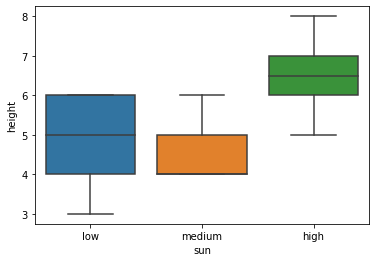

In [13]:
# lettering or grouping kaisay karni hai?
xrange= range
plt.xticks(range(26), [chr(97 + x) for x in xrange(26)])
sns.boxplot('sun', 'height', data=df)

C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='2', ylabel='height'>

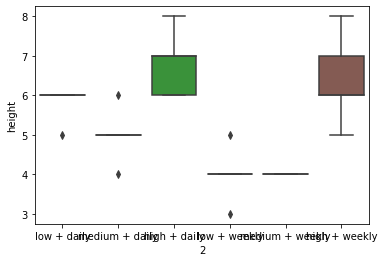

In [14]:
sns.boxplot('2', 'height', data=df)


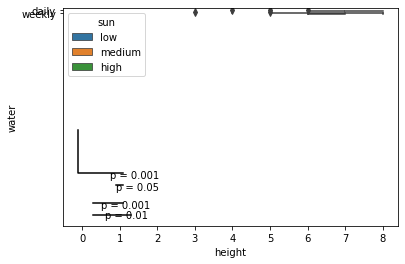

In [24]:
# Annotation kaisay karni hy graphs main?
fig2 = sns.boxplot(x='height', y='water',
                   hue='sun', data=df)

plt.plot([-0.1, -0.1, 1.1, 1.1], [48, 65, 65, 65], 'k')
plt.text(0.75, 67, 'p = 0.001')
plt.plot([0.9, 0.9, 1.1, 1.1], [70, 70, 70, 70], 'k')
plt.text(0.9, 72, 'p = 0.05')
plt.plot([0.3, 0.3, 1.1, 1.1], [77, 77, 77, 77], 'k')
plt.text(0.5, 79, 'p = 0.001')
plt.plot([0.3, 0.3, 1.3, 1.3], [82, 82, 82, 82], 'k')
plt.text(0.6, 83, 'p = 0.01')

plt.show()
